In [1]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Data Collection: Obtain a dataset with numerical features and a target variable for
prediction

In [2]:
import pandas as pd

# Load the dataset to examine its contents
file_path = '/content/drive/MyDrive/Internship/archive (6)/Housing.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows and dataset summary
housing_data.head(), housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 None)

Data Exploration and Cleaning: Explore the dataset to understand its structure, handle
missing values, and ensure data quality.

In [3]:
# Check for missing values and unique value counts
missing_values = housing_data.isnull().sum()
unique_values = housing_data.nunique()

# Basic statistics for numerical columns
numerical_stats = housing_data.describe()

# Unique values for categorical columns
categorical_columns = housing_data.select_dtypes(include='object').columns
categorical_unique = {col: housing_data[col].unique() for col in categorical_columns}

missing_values, unique_values, numerical_stats, categorical_unique


(price               0
 area                0
 bedrooms            0
 bathrooms           0
 stories             0
 mainroad            0
 guestroom           0
 basement            0
 hotwaterheating     0
 airconditioning     0
 parking             0
 prefarea            0
 furnishingstatus    0
 dtype: int64,
 price               219
 area                284
 bedrooms              6
 bathrooms             4
 stories               4
 mainroad              2
 guestroom             2
 basement              2
 hotwaterheating       2
 airconditioning       2
 parking               4
 prefarea              2
 furnishingstatus      3
 dtype: int64,
               price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    

Feature Selection: Identify relevant features that may contribute to the predictive model.

In [4]:
# Compute correlation matrix for numerical features
numerical_features = housing_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = housing_data[numerical_features].corr()

# Sort features by correlation with the target variable ('price')
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)

correlation_with_target


,price
price,1.000000
area,0.535997
bathrooms,0.517545
stories,0.420712
parking,0.384394
bedrooms,0.366494


In [5]:
# Group analysis for categorical features
categorical_means = {
    col: housing_data.groupby(col)['price'].mean() for col in categorical_columns
}

categorical_means


{'mainroad': mainroad
 no     3.398905e+06
 yes    4.991777e+06
 Name: price, dtype: float64,
 'guestroom': guestroom
 no     4.544546e+06
 yes    5.792897e+06
 Name: price, dtype: float64,
 'basement': basement
 no     4.509966e+06
 yes    5.242615e+06
 Name: price, dtype: float64,
 'hotwaterheating': hotwaterheating
 no     4.728593e+06
 yes    5.559960e+06
 Name: price, dtype: float64,
 'airconditioning': airconditioning
 no     4.191940e+06
 yes    6.013221e+06
 Name: price, dtype: float64,
 'prefarea': prefarea
 no     4.425299e+06
 yes    5.879046e+06
 Name: price, dtype: float64,
 'furnishingstatus': furnishingstatus
 furnished         5.495696e+06
 semi-furnished    4.907524e+06
 unfurnished       4.013831e+06
 Name: price, dtype: float64}

Model Training: Implement linear regression using a machine learning library (e.g., Scikit-
Learn).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Encode categorical features
# The 'sparse' argument has been replaced with 'sparse_output' in newer versions of scikit-learn.
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(housing_data[categorical_columns])

# Combine numerical and encoded categorical features
X = np.hstack((housing_data[numerical_features.drop('price')], categorical_encoded))
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1754318687330.6638, 0.6529242642153184)

Model Evaluation: Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.

In [8]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


Visualization: Create visualizations to illustrate the relationship between the predicted and
actual values.

Scatter Plot:

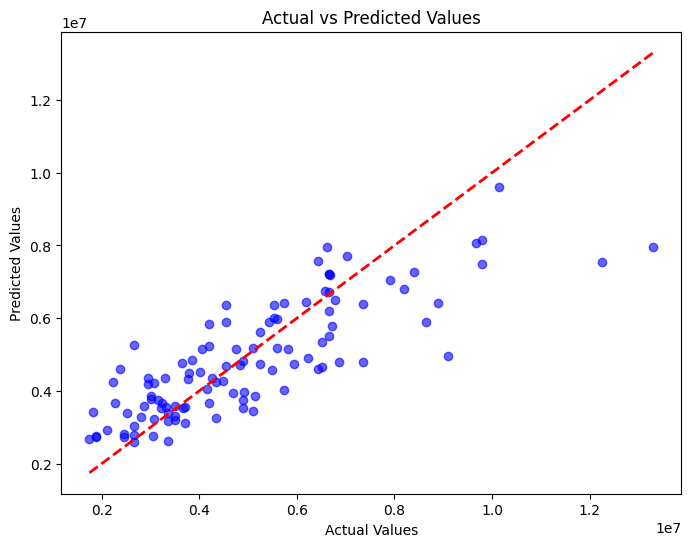

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Residual Plot:

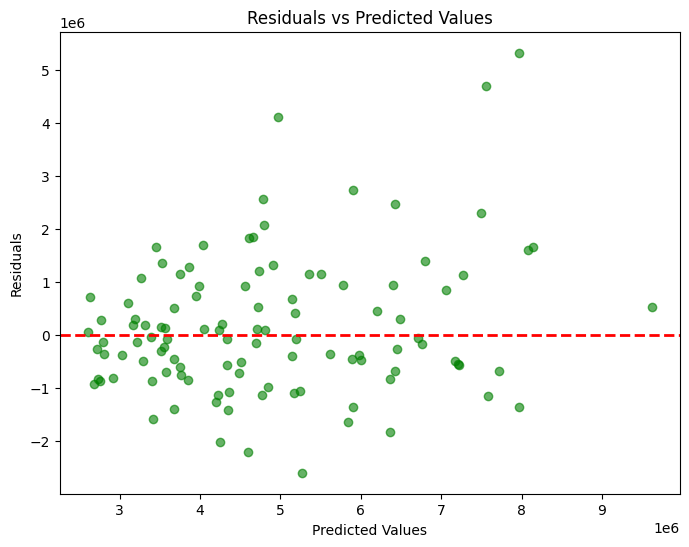

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="g")
plt.axhline(y=0, color="r", linestyle="--", lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
